In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.set_printoptions(suppress=True, precision=4)


In [ ]:
df = sns.load_dataset('titanic')
df['fare'].agg(['sum', 'mean'])

In [5]:
agg_func_math = {
    'fare':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod', 'count']
}
df.groupby(['embark_town']).agg(agg_func_math).round(2)

fare                                                     \
                  sum   mean median   min     max    std      var    mad   
embark_town                                                                
Cherbourg    10072.30  59.95  29.70  4.01  512.33  83.91  7041.39  53.02   
Queenstown    1022.25  13.28   7.75  6.75   90.00  14.19   201.30   7.87   
Southampton  17439.40  27.08  13.00  0.00  263.00  35.89  1287.95  21.30   

                                  
                      prod count  
embark_town                       
Cherbourg    6.193716e+250   168  
Queenstown    6.458671e+78    77  
Southampton   0.000000e+00   644

In [4]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [2]:
# read the data
df = pd.read_csv('../Week2/datasets//foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [36]:
agg_func_math = {
    'ratingInt': [ 'mean', 'count'] 
}

df['ratingInt'] = df.rating.str.replace('Not given', '0').astype(int)
df2 = df.query("rating in ['3', '4', '5']").groupby(['restaurant_name']).agg(agg_func_math)




In [38]:
df2.columns=['ratingMean', 'ratingCount']

In [40]:
df2.query('ratingCount > 50')

,ratingMean,ratingCount
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


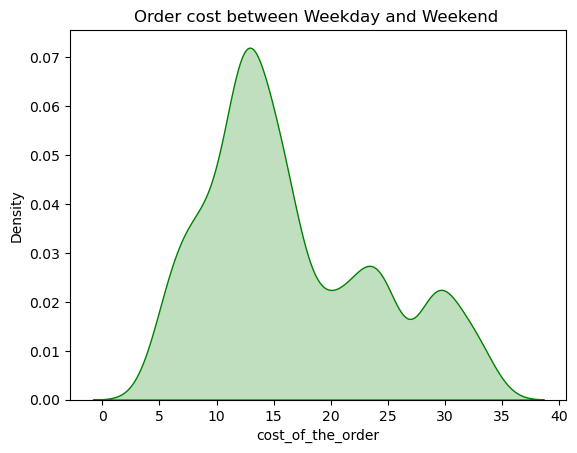

In [62]:

# # list of time
time = ['Weekday', 'Weekend']

# # iterate through time
for i in time:
    subset = df[df['day_of_the_week'] == i]

dfWeekend = df[df.day_of_the_week == "Weekend"]['cost_of_the_order'].to_frame()
dfWeekday = df[df.day_of_the_week == "Weekend"]['cost_of_the_order'].to_frame()

    
# # Draw the density plot`
# # 'hist = False' will not plot a histogram
# # 'kde = True' plots density curve
sns.kdeplot(subset['cost_of_the_order'], color='green', shade=True, label=i)
plt.title("Order cost between Weekday and Weekend ")
plt.show()

In [56]:
df1 = df[df.day_of_the_week == "Weekend"]['cost_of_the_order'].to_frame()
df1

,cost_of_the_order
0,30.75
1,12.08
3,29.20
6,6.07
11,8.10
...,...
1891,5.82
1892,29.15
1893,22.31
1894,12.18


In [4]:
pd.pivot_table(data=df, index='cuisine_type')

,cost_of_the_order,customer_id,delivery_time,food_preparation_time,order_id
cuisine_type,,,,,
American,16.319829,184169.683219,24.193493,27.440068,1.477489e+06
Chinese,16.305209,180480.855814,23.855814,27.511628,1.477530e+06
French,19.793889,158138.722222,25.333333,26.888889,1.477438e+06
Indian,16.919726,162106.397260,24.082192,27.109589,1.477493e+06
Italian,16.418691,159568.305369,24.567114,27.483221,1.477528e+06
Japanese,16.304532,161493.955319,24.131915,27.510638,1.477485e+06
Korean,14.001538,226702.000000,20.923077,25.461538,1.477426e+06
Mediterranean,15.474783,115908.130435,23.586957,27.000000,1.477483e+06
Mexican,16.933117,181453.545455,24.389610,26.727273,1.477446e+06
